# IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("C:/Users/Hp/Documents/kc_house_data.csv")

In [3]:
# viewing the dataset
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# DATA PREPROCESSING

In [5]:
seleted_columns = ["id", "date"]

In [6]:
# dropping the redundant columns
dataset = dataset.drop(seleted_columns, axis=1)

In [7]:
# viewing the dataset after dropping columns
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### VISUALIZATION OF TARGET

Text(0.5, 1.0, 'Price plot for overall period')

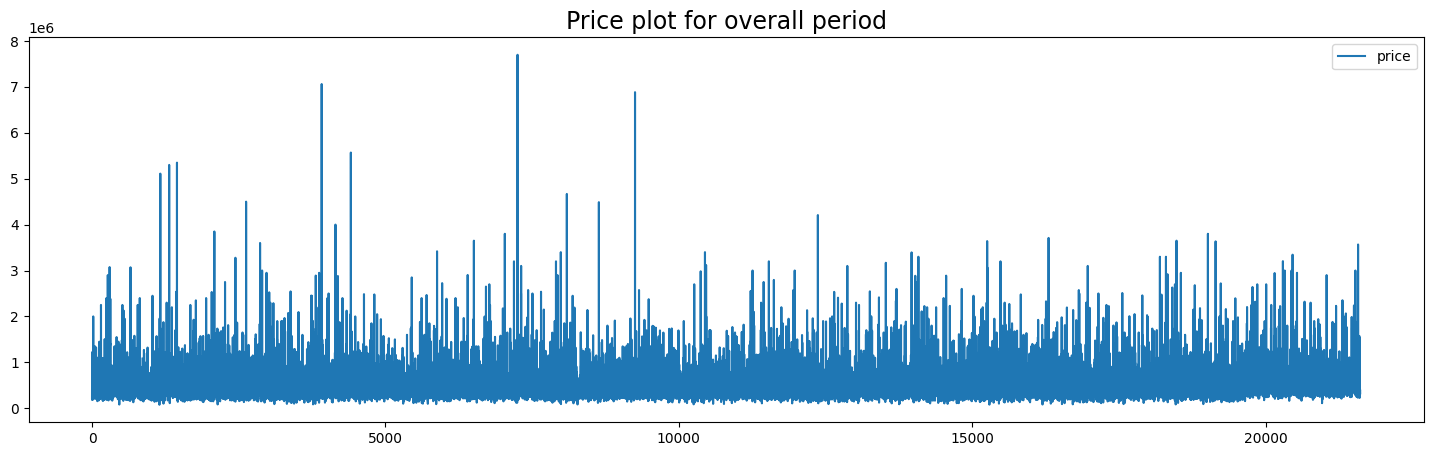

In [8]:
# univariate plot showing price distribution
dataset[["price"]].plot(figsize=(18, 5))
plt.title("Price plot for overall period", fontsize=17)

### CORRELATION HEAT MAP

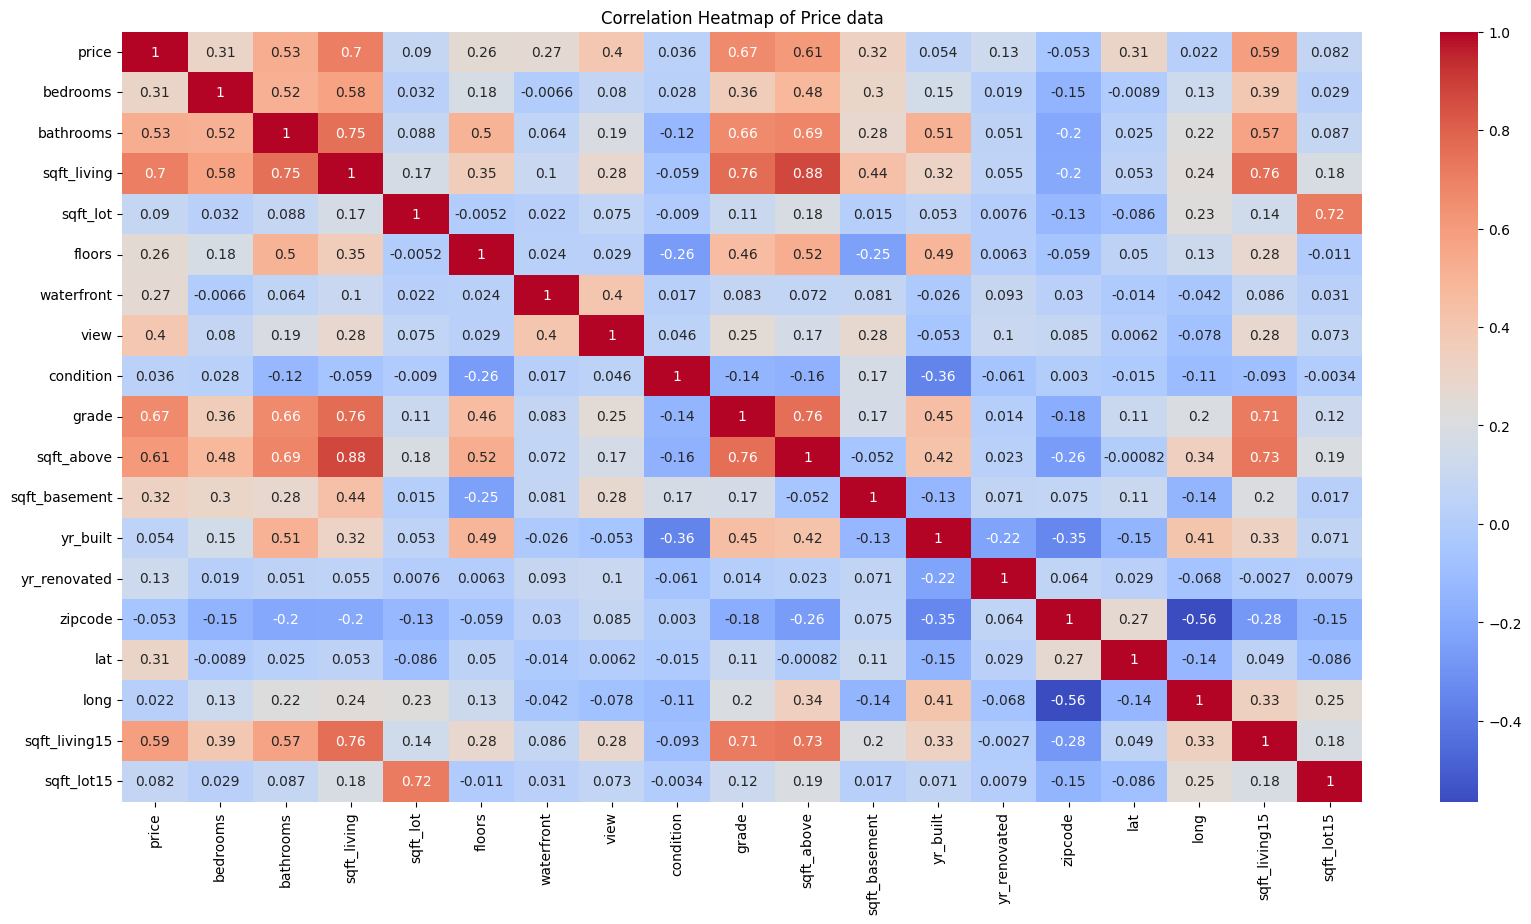

In [9]:
plt.figure(figsize=(20, 10))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap of Price data")
plt.show()

## DATA FREQUENCY DISTRIBUTION

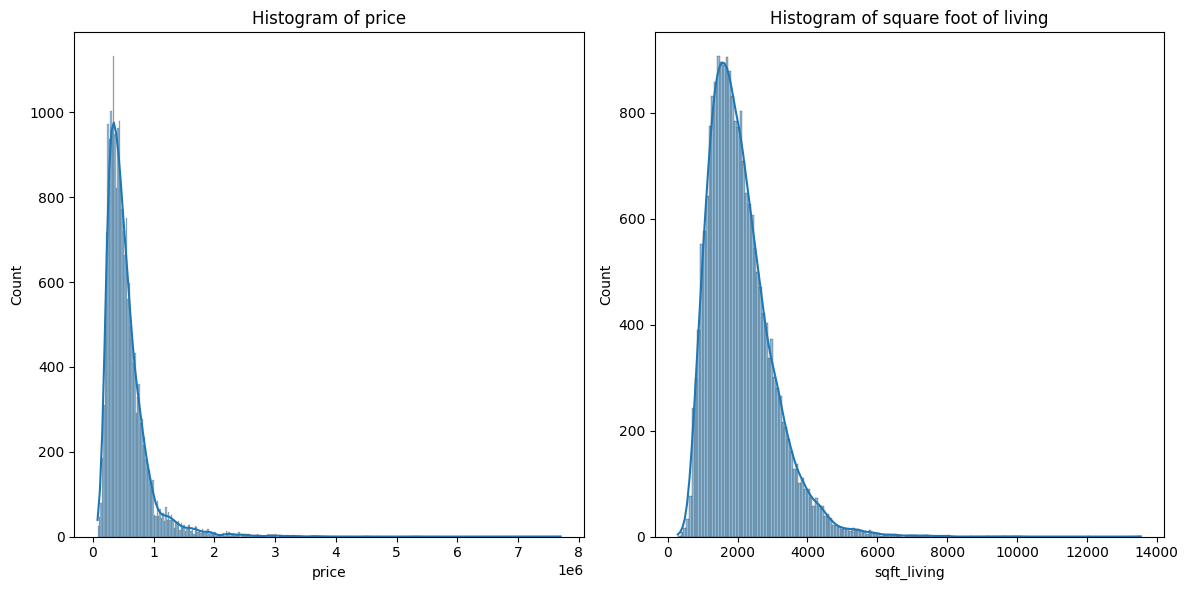

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# first subplot
sns.histplot(data=dataset, x="price", ax=axes[0], kde=True)
# second subplot
sns.histplot(data=dataset, x="sqft_living", ax=axes[1], kde=True)
# titles
axes[0].set_title("Histogram of price")
axes[1].set_title("Histogram of square foot of living")

# show plot
plt.tight_layout()
plt.show()

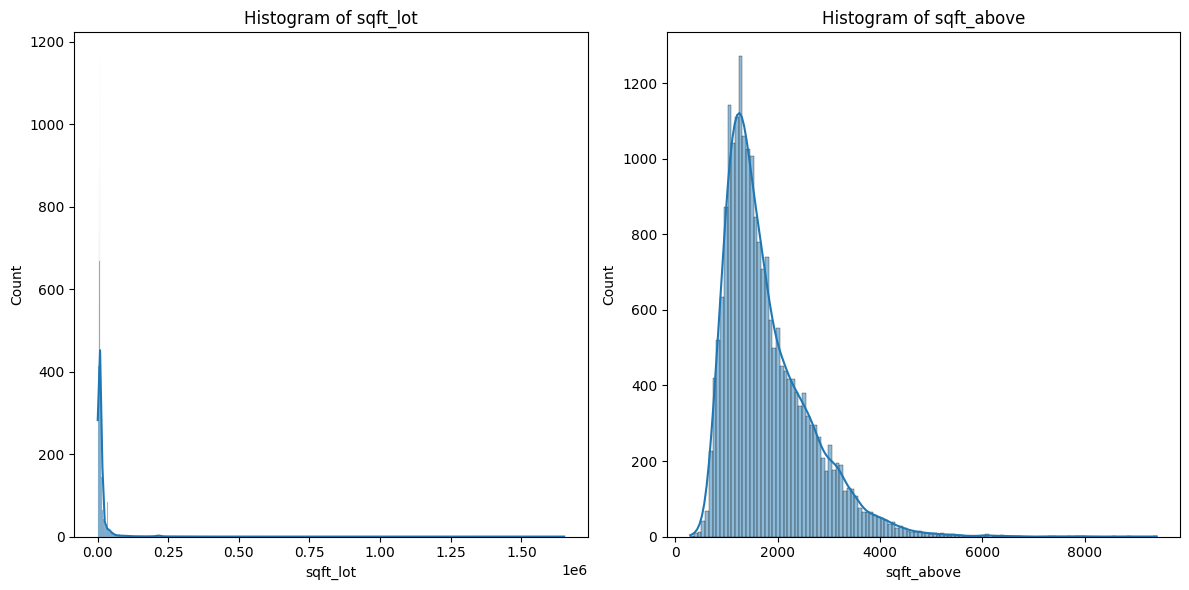

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# first subplot
sns.histplot(data=dataset, x="sqft_lot", ax=axes[0], kde=True)
# second subplot
sns.histplot(data=dataset, x="sqft_above", ax=axes[1], kde=True)
# titles
axes[0].set_title("Histogram of sqft_lot")
axes[1].set_title("Histogram of sqft_above")

# show plot
plt.tight_layout()
plt.show()

# SCATTER PLOTS

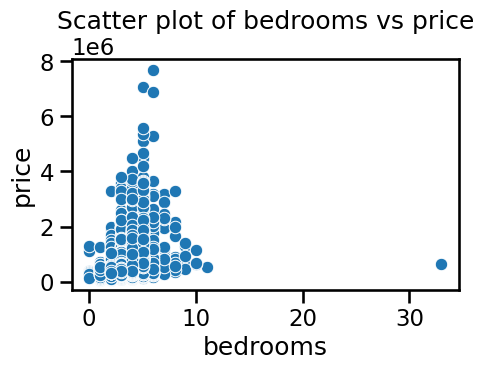

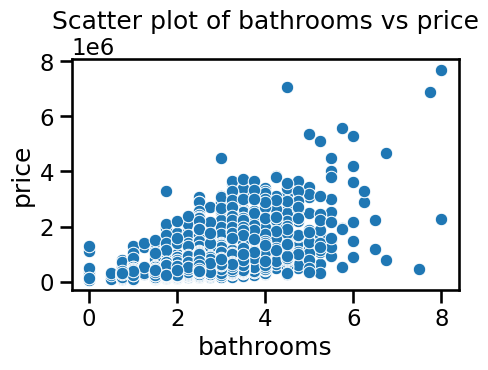

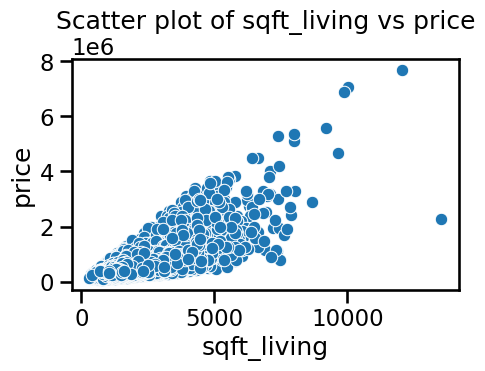

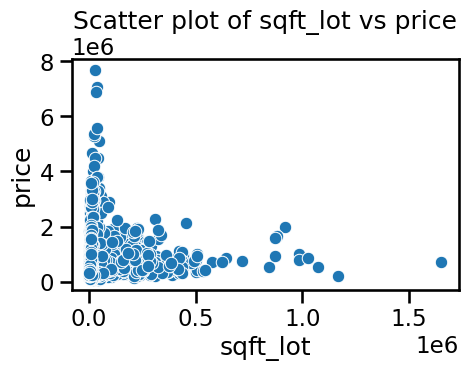

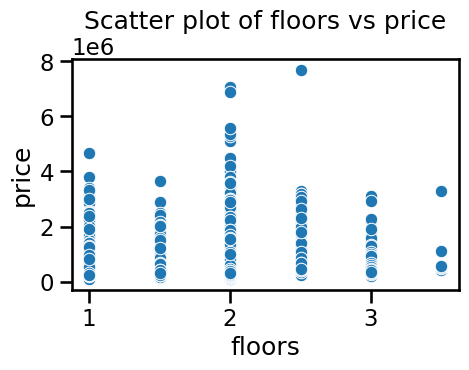

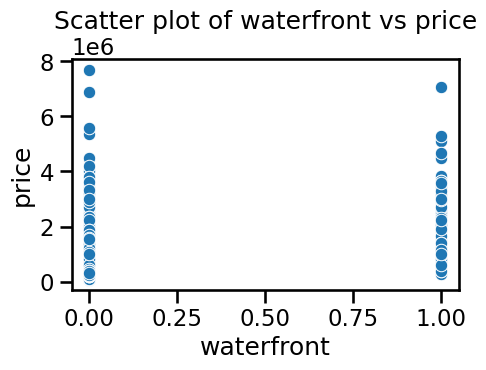

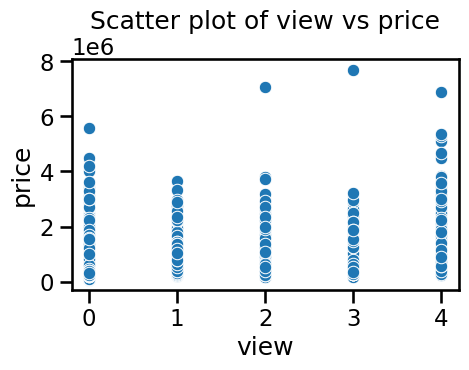

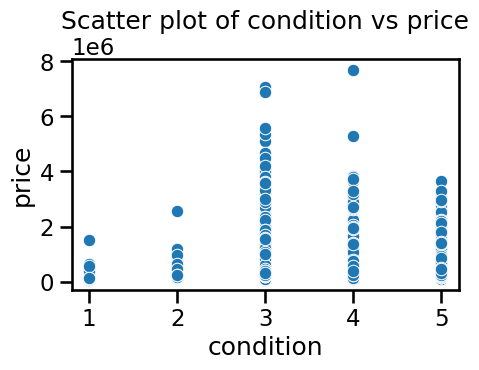

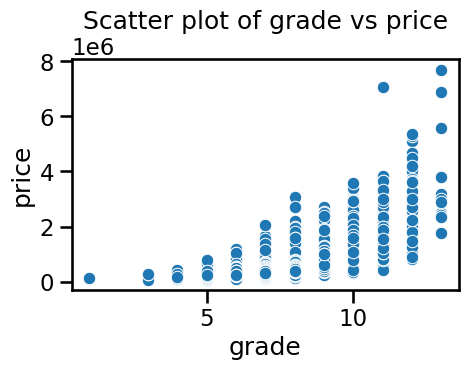

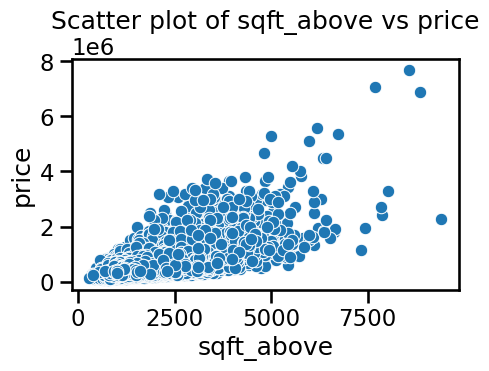

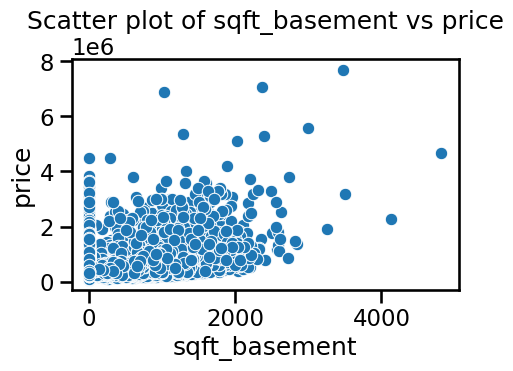

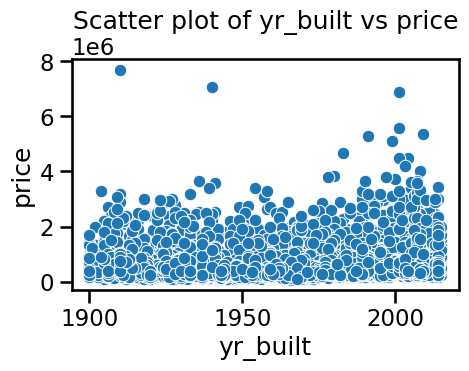

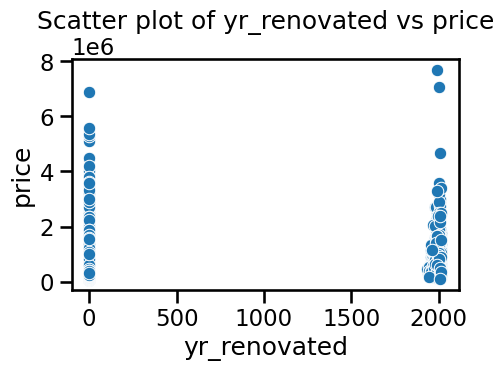

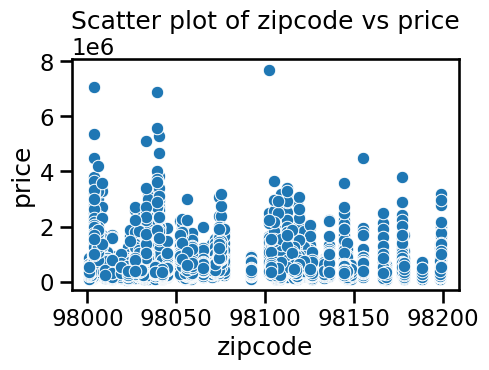

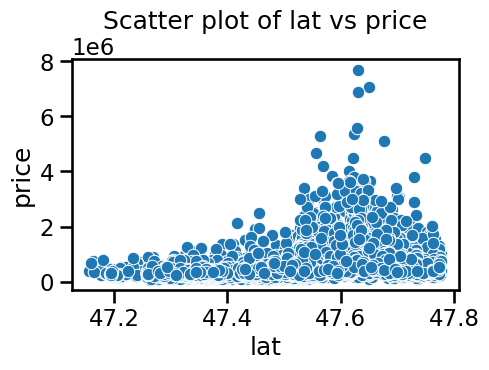

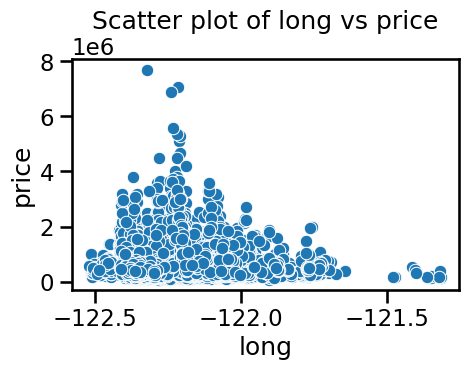

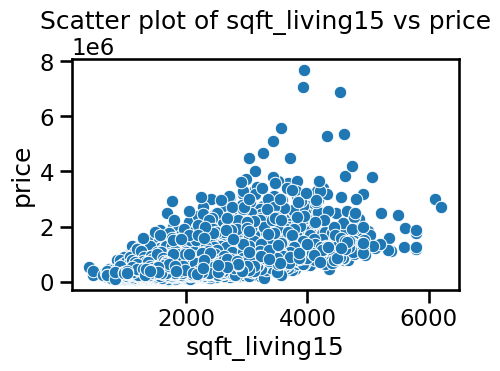

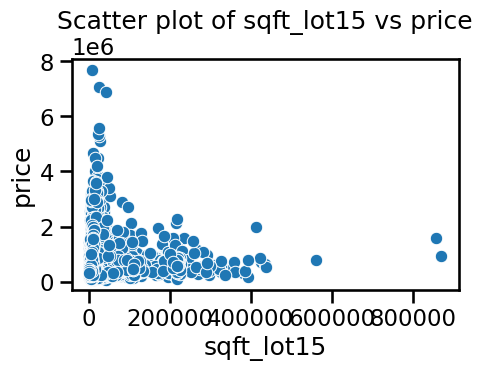

In [12]:
# scatterplot of price versus other columns in the dataset
target = dataset["price"]
features = dataset.drop("price", axis = 1)

sns.set_context("talk")

for column in features.columns:
    plt.figure(figsize =(5, 3))
    sns.scatterplot(x=features[column], y=target)
    plt.title(f"Scatter plot of {column} vs {target.name}")
    plt.xlabel(column)
    plt.ylabel(target.name)
    plt.show()

### DATA SPLITTING AND NORMALIZATION

In machine learning, data can be inputed in several magnitudes and sometimes it may hinder the model from learning some important data points or features correctly, with such a problem, the need to normalize or standardize our data becomes of utmost importance. Normalization is a technique used to transform the features of a dataset into a common scale, that is to represent the datapoints magnitude within a common range so that the machine learning is not influenced by the disproportional datapoints helping the data to converge faster and perform better.

In [13]:
# separates the dependent and the independent variables
X = dataset.drop("price", axis = 1) #independent columns
y = dataset["price"] #target

In [14]:
# splits the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

### FEATURE SELECTION

Feature selection with respect to principal component analysis involves selecting a subset of features from a dataset that captures the most variance in the data. PCA itself does not perform feature selection but rather transforms the original features into a new set of uncorrelated variables called the principal components.

In [15]:
# determining the best number for number of components 
data_standard = (dataset - np.mean(dataset, axis=0)) / np.std(dataset, axis=0)

In [16]:
data_standard.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.866717,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.005688,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868
2,-0.980849,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375
3,0.174090,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.081958,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849


In [17]:
# initializing the principal component analysis
pca = PCA()

In [18]:
pca.fit(data_standard)

PCA()

In [19]:
explained_variance = pca.explained_variance_ratio_

In [20]:
components = range(1, len(explained_variance) + 1)

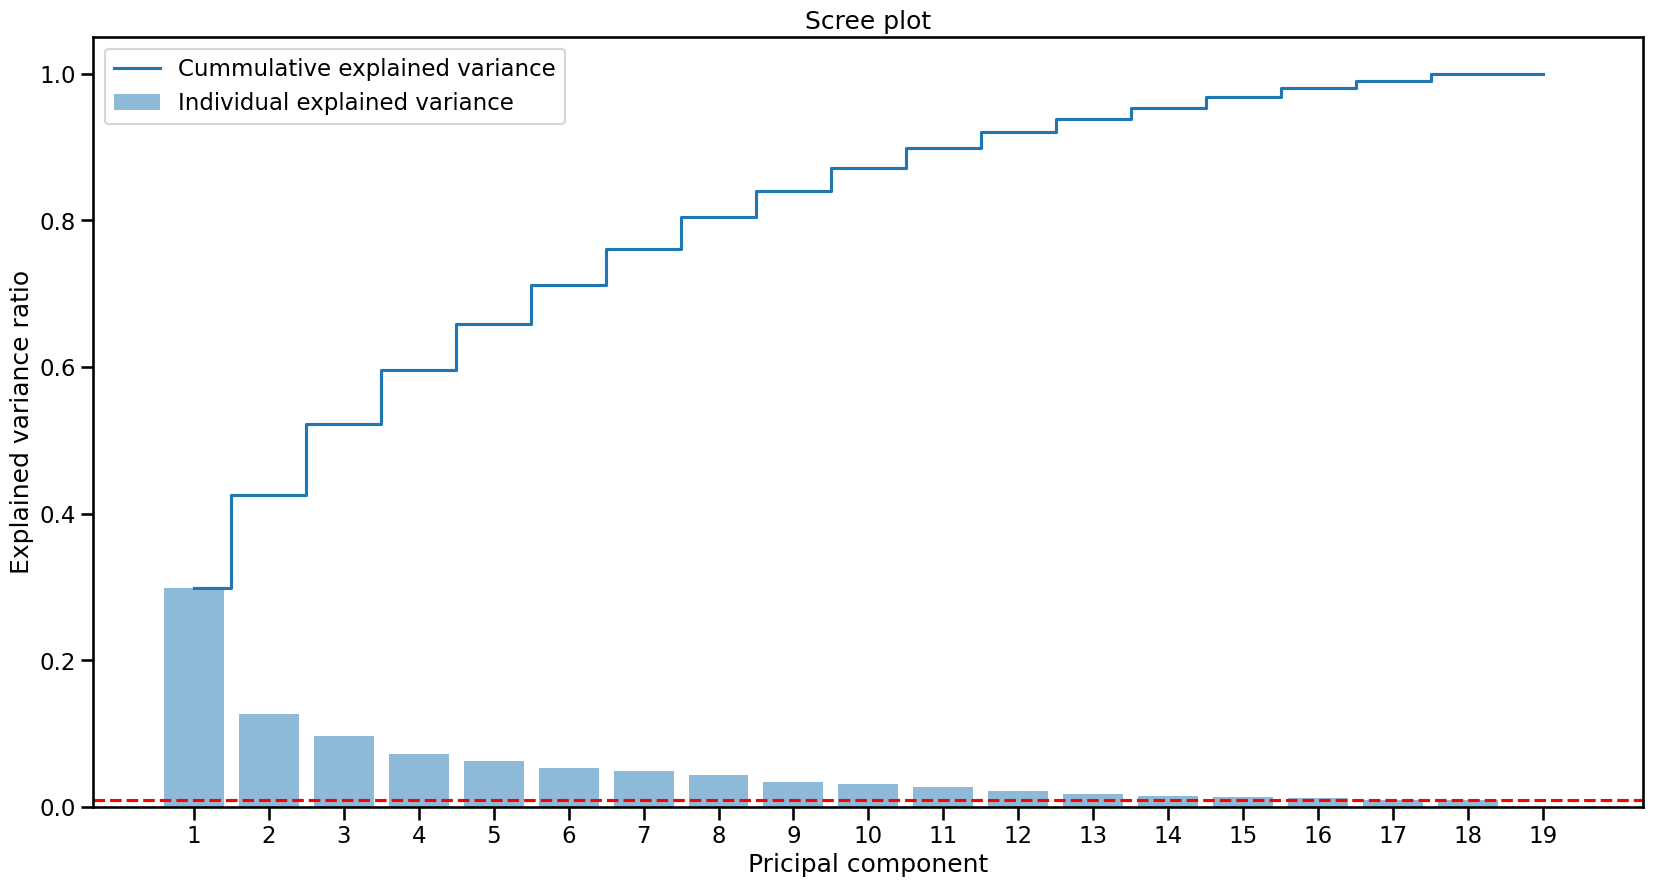

In [21]:
# plotting the scree
plt.figure(figsize=(20, 10))
plt.bar(components, explained_variance, alpha=0.5, align="center", label="Individual explained variance")
plt.step(components, np.cumsum(explained_variance), where="mid", label="Cummulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Pricipal component")
plt.title("Scree plot")
plt.legend(loc="best")
plt.axhline(y=0.01, color="r", linestyle="--")
plt.xticks(components)
plt.show()

# MACHINE LEARNING

# RANDOM FOREST REGRESSOR

In [22]:
# craete a pipeline with PCA and scaler
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=4)),
    ("regressor", RandomForestRegressor(n_estimators=300, random_state=46, max_depth=10))
])

In [23]:
# fit the pipeline on training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=4)),
                ('regressor',
                 RandomForestRegressor(max_depth=10, n_estimators=300,
                                       random_state=46))])

In [24]:
y_pred = pipeline.predict(X_test)

In [25]:
round(mean_absolute_error(y_test, y_pred), 4)

130262.401

In [26]:
round(mean_squared_error(y_test, y_pred), 4)

42399848651.3129

In [27]:
round(r2_score(y_test, y_pred), 4)

0.6598

#### COMPUTING THE ACCURACY

In [28]:
errors = abs(y_pred - y_test)

In [29]:
mape = 100 * (errors / y_test)

In [30]:
accuracy = 100 - np.mean(mape)

In [31]:
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 73.85 %.


# LINEAR REGRESSION

In [32]:
# craete a pipeline with PCA and scaler
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=4)),
    ("regressor", LinearRegression())
])

In [33]:
# fit the pipeline on training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=4)),
                ('regressor', LinearRegression())])

In [34]:
y_pred = pipeline.predict(X_test)

In [35]:
round(mean_absolute_error(y_test, y_pred), 4)

146983.8825

In [36]:
round(mean_squared_error(y_test, y_pred), 4)

48835613906.4286

In [37]:
round(r2_score(y_test, y_pred), 4)

0.6082

#### COMPUTING THE ACCURACY

In [38]:
errors = abs(y_pred - y_test)

In [39]:
mape = 100 * (errors / y_test)

In [40]:
accuracy = 100 - np.mean(mape)

In [41]:
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 69.31 %.


# NEURAL NETWORK IMPLEMENTATION

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import ToTensor
from torchvision import transforms
from tqdm.auto import tqdm
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import Dataset, DataLoader, random_split, WeightedRandomSampler
import torch.nn.functional as F

### CREATE A CUSTOM DATASET CLASS

In [43]:
class Custom_Dataset(Dataset):
    def __init__(self, X, y, transform = None):
        self.X = X
        self.y = y
        self.transform = transform
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]  

In [44]:
# Define normalization transform
transform = transforms.Compose(
    [
    transforms.ToTensor(),
]
)

#### SPLITTING THE DATA INTO FEATURES AND TARGET VARIABLES

In [45]:
X = dataset.drop("price", axis = 1).values
y = dataset["price"].values

#### TRAIN TEST SPLIT

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

In [47]:
# scaling the faetures
scaler = StandardScaler()

In [48]:
X_train = scaler.fit_transform(X_train)

In [49]:
X_test = scaler.transform(X_test)

#### CONVERT TO PYTORCH TENSORS

In [50]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

#### DATASET

In [51]:
train_dataset = Custom_Dataset(X_train, y_train, transform=transform)

In [52]:
test_dataset = Custom_Dataset(X_test, y_test, transform=transform)

#### DATALOADER

In [53]:
train_loader = DataLoader(train_dataset, 
                          batch_size=32, 
                          shuffle=True
                         )

In [54]:
test_loader = DataLoader(test_dataset,
                        batch_size=32,
                        shuffle=False
                        )

In [55]:
# checking the shape
first_batch = next(iter(train_loader))

In [56]:
# checking the dimension of the dataloader
for batch_idx, (inputs, labels) in enumerate(train_loader):
    print(f"Batch {batch_idx + 1}:")
    print(f"Input shape: {inputs.shape}, Labels shape: {labels.shape}")
    break

Batch 1:
Input shape: torch.Size([32, 18]), Labels shape: torch.Size([32])


In [57]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### BUILDING THE NEURAL NETWORK

In [58]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_dim, output_dim, final_activation):
        super(MultiLayerPerceptron, self). __init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)
        self.final_activation = final_activation
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        if self.final_activation == "sigmoid":
            x = torch.sigmoid(self.fc3(x))
        else:
            x = self.fc3(x) # regression linear output
        return x

In [59]:
reg_model = MultiLayerPerceptron(input_dim=X_train.shape[1], output_dim=1, final_activation="linear")

#### MODEL TRAINING

In [60]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=50):
    model.train()
    for epoch in range(num_epochs):
        for inputs, targets in train_loader:
            inputs = inputs.to(device, dtype = torch.float32)
            targets = targets.to(device, dtype = torch.float32)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets.view(-1, 1))
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1} / {num_epochs}, Loss: {loss.item()}")

In [61]:
criterion = nn.MSELoss()
optimizer = optim.Adam(reg_model.parameters(), lr=0.001)

In [62]:
train_model(reg_model, train_loader, criterion, optimizer)

Epoch 1 / 50, Loss: 727353917440.0
Epoch 2 / 50, Loss: 307740442624.0
Epoch 3 / 50, Loss: 102072262656.0
Epoch 4 / 50, Loss: 81420664832.0
Epoch 5 / 50, Loss: 22532947968.0
Epoch 6 / 50, Loss: 29874116608.0
Epoch 7 / 50, Loss: 73615097856.0
Epoch 8 / 50, Loss: 141991641088.0
Epoch 9 / 50, Loss: 41066901504.0
Epoch 10 / 50, Loss: 23120826368.0
Epoch 11 / 50, Loss: 33530583040.0
Epoch 12 / 50, Loss: 14393668608.0
Epoch 13 / 50, Loss: 31039860736.0
Epoch 14 / 50, Loss: 28488601600.0
Epoch 15 / 50, Loss: 17274384384.0
Epoch 16 / 50, Loss: 27295698944.0
Epoch 17 / 50, Loss: 64947871744.0
Epoch 18 / 50, Loss: 16730868736.0
Epoch 19 / 50, Loss: 49813282816.0
Epoch 20 / 50, Loss: 8697933824.0
Epoch 21 / 50, Loss: 15439136768.0
Epoch 22 / 50, Loss: 107356372992.0
Epoch 23 / 50, Loss: 50334216192.0
Epoch 24 / 50, Loss: 19038095360.0
Epoch 25 / 50, Loss: 15659866112.0
Epoch 26 / 50, Loss: 43722285056.0
Epoch 27 / 50, Loss: 28627730432.0
Epoch 28 / 50, Loss: 12120482816.0
Epoch 29 / 50, Loss: 9674

#### EVALUATE THE MODEL

In [63]:
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        predictions = model(X_test)
        if model.final_activation == "sigmoid":
            predictions = torch.round(predictions)
            correct = (predictions == y_test.view(-1, 1)).float().sum()
            accuracy = correct / y_test.shape[0]
            print(f"Accuracy: {accuracy.item()}")
        else:
            mse = F.mse_loss(predictions, y_test.view(-1, 1))
            print(f"MSE: {mse.item()}")

In [64]:
evaluate_model(reg_model, X_test, y_test)

MSE: 28498184192.0
